<a href="https://colab.research.google.com/github/sion0507/Robot_simul_code/blob/main/Robot_Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install "pybullet>=3.2.5,<4.0" "gradio>=4.44.0,<5.0" pillow imageio imageio-ffmpeg numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 MB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 9.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-adk 1.13.0 requires websockets<16.0.0,>=15.0.1, but you have websockets 12.0 which is incompatible.
dataproc-spark-connect 0.8.3 requires websockets>=14.0, but you have websockets 12.0 which is incompatible.
yfinance 0.2.65 requires websockets>=13.0, but you have websockets 12.0 which is incompatible.
google-genai 1.33.0 requires websockets<15.1.0,>=13.0.0, but you have websock

In [ ]:
!pip install -U "websockets>=15.0.1,<15.1.0"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.5/182.5 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 12.0
    Uninstalling websockets-12.0:
      Successfully uninstalled websockets-12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio-client 1.3.0 requires websockets<13.0,>=10.0, but you have websockets 15.0.1 which is incompatible.


In [ ]:
import websockets
print(websockets.__version__)

15.0.1


In [ ]:
import pybullet as p, pybullet_data
from PIL import Image
import numpy as np

In [ ]:
cid = p.connect(p.DIRECT)
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.setGravity(0,0,-9.8)
p.setTimeStep(1.0/60.0)

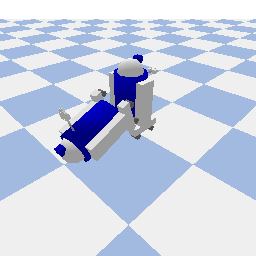

In [ ]:
# 2) 장면 구성: 바닥 + 간단 로봇
plane = p.loadURDF("plane.urdf")
robot = p.loadURDF("r2d2.urdf", [0,0,10])

# 3) 물리 스텝 몇 번
for _ in range(1200):
    p.stepSimulation()

# 4) TinyRenderer로 한 프레임 렌더(헤드리스 환경)
view = p.computeViewMatrixFromYawPitchRoll(cameraTargetPosition=[0,0,0],
                                           distance=3, yaw=45, pitch=-35, roll=0,
                                           upAxisIndex=2)
proj = p.computeProjectionMatrixFOV(fov=60, aspect=1.0, nearVal=0.1, farVal=10.0)
w,h,rgba,_,_ = p.getCameraImage(256,256, view, proj, renderer=p.ER_TINY_RENDERER)

img = Image.fromarray(rgba[:,:,:3])
display(img)



In [ ]:
import gradio as gr

def echo(x):
  return f"입력: {x}"

with gr.Blocks() as demo:
  gr.Markdown("### Gradio 연결 테스트")
  inp = gr.Textbox(label="아무 텍스트")
  out = gr.Textbox(label="결과")
  inp.submit(echo,inp,out)

In [ ]:
demo.launch(share=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>